In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
rg = np.random.default_rng()

class ToyDataGenerator():
    def __init__(self, dim: int, n_class: int):
        self.mu_for_class_np = rg.normal(0, 1, size=(n_class, dim))
        self.dim = dim
        self.n_class = n_class
        
    def get_data(self, N_batch:int):
        x = []
        y = []
        for n in range(self.n_class):
            mu = self.mu_for_class_np[n]
            x = x + (rg.normal(0, .2, size=(N_batch//self.n_class,self.dim)) + mu).tolist()
            y = y + (n*np.ones(shape=(N_batch//self.n_class, 1))).tolist()   
        return np.array(x).astype(np.float32), np.array(y).astype(np.int32)

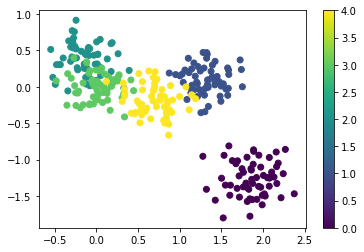

In [9]:
dg = ToyDataGenerator(dim=2, n_class=5)
x_train, y_train = dg.get_data(N_batch=300)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train)
    
plt.colorbar()
plt.show()

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
                                     tf.keras.layers.Dense(8, activation='relu'),
                                     tf.keras.layers.Dense(5, activation='softmax')])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

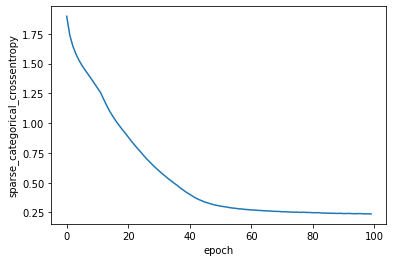

In [13]:
Hist= model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)
# 学習曲線のプロット
plt.xlabel("epoch"); plt.ylabel("sparse_categorical_crossentropy")
plt.plot(np.arange(100), Hist.history['loss']);plt.show()

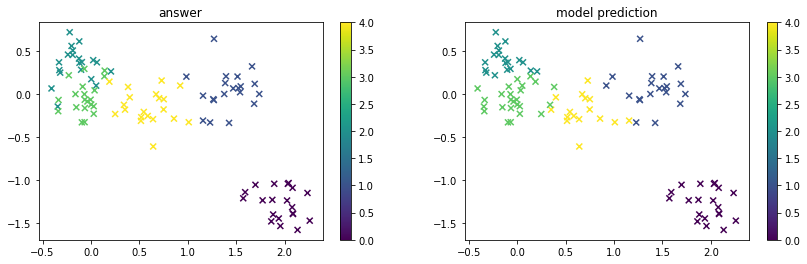

In [14]:
x_unknown, y_unknown = dg.get_data(100)

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title("answer")
plt.scatter(x_unknown[:,0], x_unknown[:,1], c=y_unknown, marker="x")
plt.colorbar()

plt.subplot(1,2,2)
plt.title("model prediction")
plt.scatter(x_unknown[:,0], x_unknown[:,1], c=np.argmax(model.predict(x_unknown), axis=1), marker="x")
plt.colorbar()

plt.show()